In [ ]:
""" 
Goal:
Given a trial, extract a timeseries of features, where feature dimensions reflects hypothesized hierarhical
variables.

Related to k99 specific aims, and preparing for neural analsyusis.

Questions:
- feasibility of this approach. 
-- Enough independent vairation of each parameter given the aniamls behavipr? Given the stimulus datset?
-- How clean are the features at each timepoint?

==9/12/22 - Consolidating here also assigning each stroke a datseg (discrete labels, like position, or shape)

"""


In [1]:
from pythonlib.dataset.dataset import Dataset
from pythonlib.dataset.dataset_preprocess.general import preprocessDat
import numpy as np
import matplotlib.pyplot as plt
from pythonlib.dataset.analy_dlist import concatDatasets
import pandas as pd
import seaborn as sns

In [ ]:
# SDIR = "/data2/analyses/notebook/analy_diagnostic_model_220208"
# import os
# os.makedirs(SDIR, exist_ok=True)

##### Extract and preprocess dataset

In [2]:
expt = "shapedirsequence1"
animal = "Pancho"
# list_rule = ["baseline", "linetocircle", "circletoline", "lolli"]
rule = "null"

# expt = "gridlinecircle"
# animal = "Pancho"
# # list_rule = ["baseline", "linetocircle", "circletoline", "lolli"]
# list_rule = ["circletoline", "lolli"]

D = Dataset([])
D.load_dataset_helper(animal, expt, rule = rule)


# # assert False, "this removes the test task sthat were not done at baseline, but were done for the three grammars"
# only_keep_trials_across_groupings = False
# # Ideally include all tasks, but if want to compare to baseline, then only include those baseline tasks.
# D, GROUPING, GROUPING_LEVELS, FEATURE_NAMES, SCORE_COL_NAMES = preprocessDat(D, expt, 
#                                                      only_keep_trials_across_groupings=only_keep_trials_across_groupings)
    

Searching using this string:
/gorilla1/analyses/database/*Pancho-*shapedirsequence1-*null-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/gorilla1/analyses/database/BEH/*Pancho-*shapedirsequence1-*null-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/gorilla1/analyses/database/BEH/Pancho-shapedirsequence1-null-220827_093535
----------------
Currently loading dataset pkl: /gorilla1/analyses/database/BEH/Pancho-shapedirsequence1-null-220827_093535
.. Done!
Loaded metadat:
{'sketchpad_edges': array([[-311.84, -224.8 ],
       [ 311.84,  429.6 ]]), 'metadat_probedat': {'sdate': 220825, 'edate': 220826, 'strokmodel_kind': None, 'strokmodel_tstamp': None, 'datecategories': {'220825': 1, '220826': 1}, 'dates_for_summary': [], 'matchedstrokes': None, 'exptnames': ['shapedirsequence1', 'shapedirsequence1b'], 'T1': [], 'G1': [], 'G2': [], 'G3': [], 'G4': [], 'description': '', 'finalized': False, 'good_expt': True, 'expt

TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskge

TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
TODO (taskgeneral)
added new column self.Dat[Task]
- starting/ending len (grouping params):
1107
*** Rules/epochs reassigning using the following rules:
{(None, None): 'baseline', ('directionv2', ('lr',)): 'rightward', ('directionv2', ('rl',)): 'leftward', ('directionv2', ('ud',)): 'downward', ('directionv2', ('du',)): 'upward', ('prot_prims_in_order', ('line-8-3', 'V-2-4', 'Lcentered-4-3')): 'order_lVL_1', ('prot_prims_in_order', ('Lcentered-4-3', 'V-2-4', 'line-8-3')): 'order_LVl_1', ('prot_prims_in_order', ('V-2-4', 'line-8-3', 'Lcentered-4-3')): 'order_VlL_1', ('prot_prims_chunks_in_order', ('line-8-4', 'line-8-3')): 'AnBm', ('hack_220829', ('hac

##### For all beh trials, get alignment to task 


In [3]:
# Extract all behclass
D.behclass_generate_alltrials()
# compute beh-task alignemnets
D.behclass_alignsim_compute()


stored in self.Dat[BehClass]
0
200
400
600
800
1000


### Extract discrete features (datseg), like shape, location, etc)

TODO: instead of ShapesOldCoords, should first concatenate strokes that are (i) in same motif and (ii) touching
see: get_grid_ver
should be in self.PrimitivesObjects


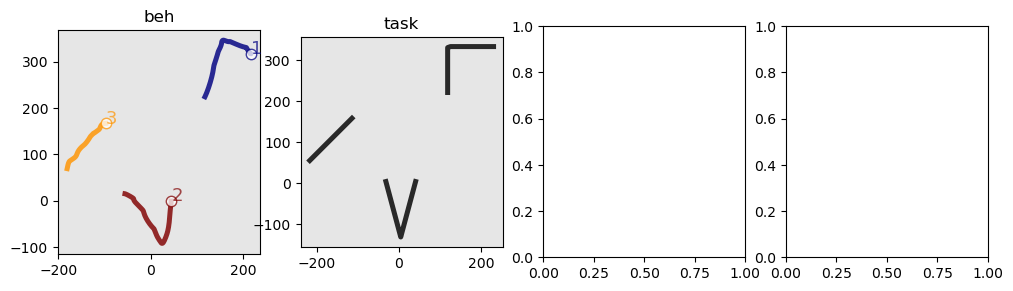

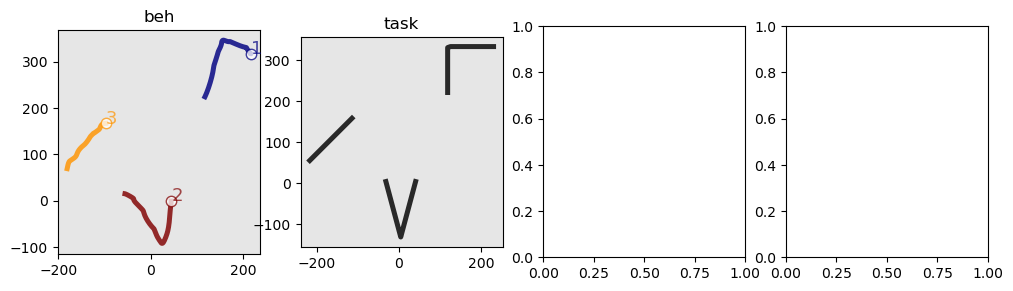

In [4]:
trial = 100

_, datsegs_behlength, _, out_combined = D.behclass_extract_beh_and_task(trial)
# datsegs_behlength is what I want.

D.plotSingleTrial(trial)


### Extract features (motor-based)


In [ ]:
_, _, idxs = D.plotMultTrials(5, color_by="order", return_idxs=True);
D.plotMultTrials(idxs, "strokes_task");

In [ ]:
# - (rule, chunk, stroke, xyz)
# 	- (chunk ordinal, stroke ordinal, total num chunks, total num strokes, total dist travelled, segmentation (onsets offsets of strokes/chunks), doneness) 

In [ ]:
# Pick a trial 
idx = 1190
trialcode = D.Dat.iloc[idx]["trialcode"]
Beh = D.Dat.iloc[idx]["BehClass"]
print(idx, ' - ' , trialcode)

D.plotMultTrials([idx], color_by="order", return_idxs=True);
D.plotMultTrials([idx], "strokes_task");
D.plotMultTrialsTimecourse([idx], ncols=2)

In [ ]:
# Extract time of events
motor = D.get_motor_stats(idx)
motor

# go cue
motor["go_cue"]

# raise
motor["raise"]

# stroke onsets
motor["ons"]

# stroke offsets
motor["offs"]

# touch done
motor["done_touch"]

# 

##### Combine all variables


In [ ]:
twind = [8.2, 9.4]
Beh.timepoint_extract_features_all(twind)

##### Collect features across all time windows

In [ ]:
# at every point on the drawing, draw a vector reflecting instantenous velocity.
# print([s.shape for s in strokes_vel])
# print([s.shape for s in strokes_beh])
# print([s.shape for s in strokes_speeds])


tbinsize = 0.1
tend = Beh.Strokes[-1][-1,2]
timebin_centers = np.arange(tbinsize/2, tend+tbinsize, tbinsize)

dat = []
for t in timebin_centers:
    twind = [t-tbinsize/2, t+tbinsize/2]
    
    featuredict = Beh.timepoint_extract_features_all(twind)
    if featuredict is not None:
        # Then keep
        dat.append({
            'tcenter':t,
            'twind':twind})
        for f,v in featuredict.items():
            dat[-1][f] = v

dat

##### Plots

In [ ]:
SDIR = "/data2/analyses/notebook/analy_featuretuples_timecourse/FIGS"
import os
os.makedirs(SDIR, exist_ok=True)

In [ ]:
dat[0].keys()

In [ ]:
#### Plot original trial stuff
fig1, axes, _ = D.plotMultTrials([idx], color_by="order", return_idxs=True)
fig2 = D.plotMultTrials([idx], "strokes_task")
D.plotMultTrialsTimecourse([idx], ncols=2)

fig1.savefig(f"{SDIR}/strokes_beh.pdf")
fig2.savefig(f"{SDIR}/strokes_task.pdf")


In [ ]:
#### Plot 2d image, showing spatial locations and velocity vectors
fig, ax = plt.subplots(1,1, figsize=(8,5))

pts = np.stack([d["cont_pos_mean_xy"] for d in dat])
# ax.scatter(pts[:,0], pts[:,1])
ax.plot(pts[:,0], pts[:,1],  ':ok')

# Overlay vel
vels = np.stack([d["cont_vel_mean_xy"] for d in dat])
# ax.plot(pts[:,0], pts[:,1],  '-ok')
ax.quiver(pts[:,0], pts[:,1], vels[:,0], vels[:,1], color='r') 

fig.savefig(f"{SDIR}/2d_pos_velocities.pdf")

In [ ]:
# Plot features(y) vs. time (x)
nfeatures = len(dat[0].keys())-2
ncols = 3
nrows = int(np.ceil(nfeatures/ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*3))

plt.figure()
plt.plot(np.array([d["tcenter"] for d in dat]), np.array([d["catg_ordinal"] for d in dat]))


In [ ]:

df = pd.DataFrame(dat)
sns.relplot(data = df, x='tcenter', y='catg_ordinal')